In [2]:
from keras.datasets import cifar10
from keras import utils as np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [11]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_Train4D_normalize=x_train/255
x_Test4D_normalize=x_test/255

In [12]:
y_TrainOneHot=np_utils.to_categorical(y_train)
y_TestOneHot=np_utils.to_categorical(y_test)

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [17]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5,5), padding='same', input_shape=(32,32,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=36, kernel_size=(5,5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 16)        1216      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 36)        14436     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 36)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 8, 8, 36)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               295040    
__________

In [18]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [19]:
x_Train4D_normalize=x_Train4D_normalize[:1000]
y_TrainOneHot=y_TrainOneHot[:1000]
train_history = model.fit(x=x_Train4D_normalize, y=y_TrainOneHot, validation_split=0.2, epochs=20, batch_size=300, verbose=2)

Train on 800 samples, validate on 200 samples
Epoch 1/20
 - 27s - loss: 2.3234 - acc: 0.1225 - val_loss: 2.3096 - val_acc: 0.0800
Epoch 2/20
 - 20s - loss: 2.2771 - acc: 0.1475 - val_loss: 2.2906 - val_acc: 0.1250
Epoch 3/20
 - 21s - loss: 2.2453 - acc: 0.1562 - val_loss: 2.2449 - val_acc: 0.1950
Epoch 4/20
 - 24s - loss: 2.1932 - acc: 0.2175 - val_loss: 2.1920 - val_acc: 0.1850
Epoch 5/20
 - 24s - loss: 2.1081 - acc: 0.2412 - val_loss: 2.0908 - val_acc: 0.2350
Epoch 6/20
 - 21s - loss: 2.0253 - acc: 0.2825 - val_loss: 2.0480 - val_acc: 0.3100
Epoch 7/20
 - 21s - loss: 2.0088 - acc: 0.2750 - val_loss: 1.9854 - val_acc: 0.3050
Epoch 8/20
 - 21s - loss: 1.9403 - acc: 0.2825 - val_loss: 1.9748 - val_acc: 0.2650
Epoch 9/20
 - 21s - loss: 1.9158 - acc: 0.3050 - val_loss: 1.9879 - val_acc: 0.2950
Epoch 10/20
 - 21s - loss: 1.9091 - acc: 0.2950 - val_loss: 1.9624 - val_acc: 0.3050
Epoch 11/20
 - 22s - loss: 1.8559 - acc: 0.3337 - val_loss: 1.9182 - val_acc: 0.3400
Epoch 12/20
 - 20s - loss: 1

In [20]:
model.save('t05.h5')

In [21]:
import matplotlib.pyplot as plt
def show_train_history(train_acc, test_acc):
    plt.plot(train_history.history[train_acc])   
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel("Epoch")
    plt.legend(['train','test'], loc = 'upper left')
    plt.show()

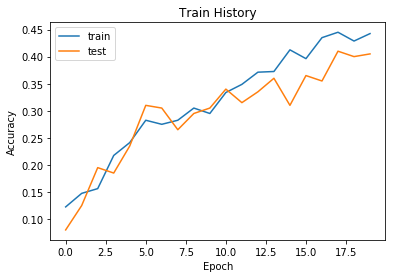

In [22]:
show_train_history('acc','val_acc')

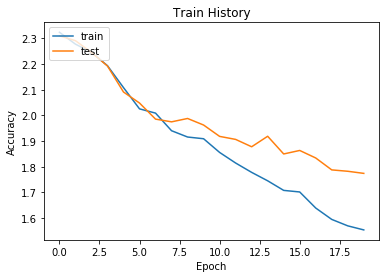

In [23]:
show_train_history('loss','val_loss')

In [24]:
scores = model.evaluate(x_Test4D_normalize, y_TestOneHot)
scores[1]

10000/10000 [==============================] - 5s 475us/step


0.3733

In [25]:
prediction=model.predict_classes(x_Test4D_normalize)

In [26]:
prediction[:10]

array([5, 1, 8, 8, 6, 6, 6, 6, 4, 1], dtype=int64)

In [30]:
label_dict={0:'airplane',1:'automobile',2:'bird',3:'cat',4:'deer',5:'dog',6:'frog',7:'horse',8:'ship',9:'trunk'}

In [31]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig=plt.gcf()
    fig.set_size_inches(12,14)
    if num>25: num=25
    for i in range(0, num):
        ax=plt.subplot(5,5,1+i)
        ax.imshow(images[idx], cmap='binary')
        title = str(i) + ',' + label_dict[labels[i][0]]
        if len(prediction)>0:
            title += '=>' + label_dict[prediction[i]]
        ax.set_title(title, fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
        idx+=1
    plt.show()

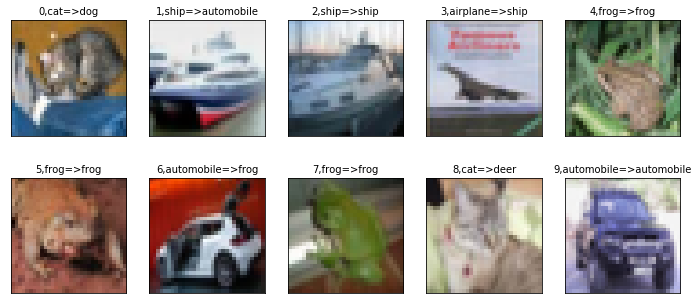

In [32]:
plot_images_labels_prediction(x_test, y_test, prediction, idx = 0)

In [29]:
import pandas as pd
pd.crosstab(y_test, prediction, rownames=['label'], colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,126,0,131,3,0,66,0,5,87,562
1,0,1111,1,11,0,0,2,1,0,9
2,2,13,909,15,0,7,20,29,14,23
3,0,7,31,893,0,21,0,26,3,29
4,0,15,41,0,3,13,2,457,0,451
5,39,5,37,339,1,270,3,28,27,143
6,7,33,582,47,1,18,188,22,42,18
7,0,20,20,1,0,0,1,905,0,81
8,6,18,13,119,1,7,7,25,498,280


In [32]:
df = pd.DataFrame({'label':y_test, 'predict':prediction})

In [34]:
df[(df.label==5)&(df.predict==3)]

,label,predict
15,5,3
23,5,3
45,5,3
53,5,3
102,5,3
120,5,3
129,5,3
132,5,3
153,5,3
165,5,3
